##  Exploratory Data Analysis¶

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv(r"C:\Users\dell\Downloads\Uber Request Data.csv")
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [2]:
print(df.shape)
print(df.info())

(6745, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB
None


In [3]:
#Check for duplicates in Request id
ids = df[['Request id']]
is_duplicate = ids.duplicated()
sum(is_duplicate)

0

In [4]:
#Check for any missing values in the data set
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [5]:
cars_NA = len(df[df['Status'] == 'No Cars Available'])
trip_cancel = len(df[df['Status'] == 'Cancelled'])
print("No. of request not accepted due to unavailability of cars: " + str(cars_NA))
print("No. of unattended requests (cars not available + driver cancelled): " + str(cars_NA+trip_cancel))

No. of request not accepted due to unavailability of cars: 2650
No. of unattended requests (cars not available + driver cancelled): 3914


In [6]:
#Correcting the data types
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [8]:
#Extracting pick-up and drop time, day, hour for further analysis
df['pick_date'] = df['Request timestamp'].dt.date
df['pick_day'] = df['Request timestamp'].dt.day
df['pick_hour'] = df['Request timestamp'].dt.hour


df['drop_date'] = df['Drop timestamp'].dt.date
df['drop_day'] = df['Drop timestamp'].dt.day
df['drop_hour'] = df['Drop timestamp'].dt.hour

df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,pick_date,pick_day,pick_hour,drop_date,drop_day,drop_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,7,11,2016-11-07,7.0,13.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,7,17,2016-11-07,7.0,18.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,7,9,2016-12-07,7.0,9.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,7,21,2016-12-07,7.0,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,13,8,2016-07-13,13.0,9.0


In [9]:
#Cross checking
print(df['pick_date'].unique())
print("\n")
print(df['drop_date'].unique())

[datetime.date(2016, 11, 7) datetime.date(2016, 12, 7)
 datetime.date(2016, 7, 13) datetime.date(2016, 7, 14)
 datetime.date(2016, 7, 15)]


[datetime.date(2016, 11, 7) datetime.date(2016, 12, 7)
 datetime.date(2016, 7, 13) datetime.date(2016, 7, 14)
 datetime.date(2016, 7, 15) datetime.date(2016, 7, 16) NaT]


In [10]:
print(df['drop_date'].value_counts())

2016-11-07    582
2016-07-13    569
2016-12-07    568
2016-07-15    546
2016-07-14    536
2016-07-16     30
Name: drop_date, dtype: int64


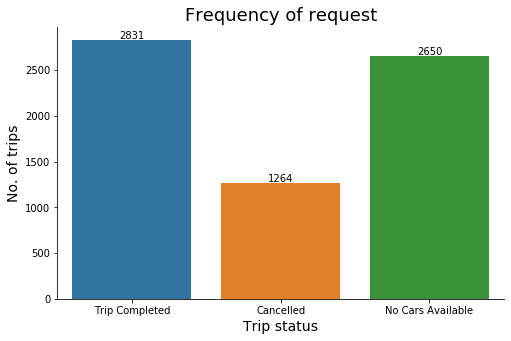

In [11]:
#Plot a countplot on "Status" column to identify count of completed trips, cancelled, and no cars available. 
plt.figure(figsize=(8, 5))
g = sns.countplot(x="Status", data=df)
sns.despine()
plt.title("Frequency of request", fontsize = 18)
plt.xlabel("Trip status", fontsize = 14)
plt.ylabel("No. of trips", fontsize = 14)

for p in g.patches:
    g.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height() + 50), ha = 'center', va = 'center')

plt.show()

In [12]:
grp = df.groupby('Status')['Request id'].count()

percent_completed = grp["Trip Completed"]/ len(df) * 100
percent_cancel = grp['Cancelled']/ len(df) * 100
percent_nocars = grp['No Cars Available']/ len(df) * 100

print("The percentage of trips completed: " + "{:.2f}".format(percent_completed))
print("The percentage of trips cancelled: " + "{:.2f}".format(percent_cancel))
print("The percentage of requests cancelled due to unavailability of cabs: " + "{:.2f}".format(percent_nocars))

The percentage of trips completed: 41.97
The percentage of trips cancelled: 18.74
The percentage of requests cancelled due to unavailability of cabs: 39.29


More than 50% of the requests are unserved i.e. either cancelled or unavailability of cabs. The unserved requests are more than the served ones, suggesting there is high untapped demand.

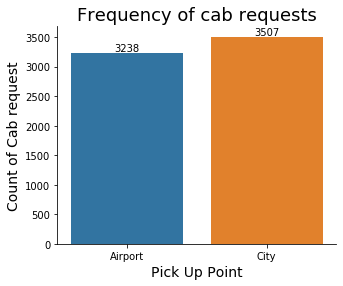

In [13]:
#Plot a countplot on a "Pick point" column to identify count of requests from Airport and City

plt.figure(figsize=(5, 4))
l = sns.countplot(x = "Pickup point", data = df)
sns.despine()
plt.title("Frequency of cab requests", fontsize = 18)
plt.xlabel("Pick Up Point", fontsize = 14)
plt.ylabel("Count of Cab request", fontsize = 14)

for p in l.patches:
    l.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height() + 70), ha = 'center', va = 'center')

plt.show()

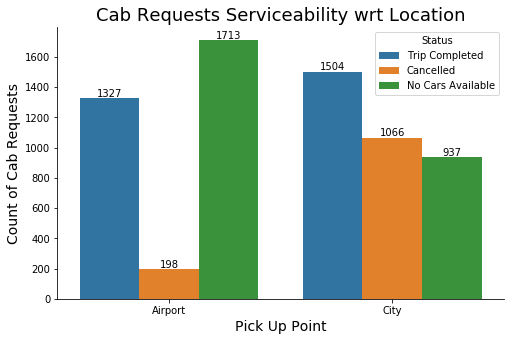

In [14]:
#cab requests w.r.t. location
plt.figure(figsize=(8, 5))
l = sns.countplot(x = "Pickup point", hue = "Status", data = df)
sns.despine()
plt.title("Cab Requests Serviceability wrt Location", fontsize = 18)
plt.xlabel("Pick Up Point", fontsize = 14)
plt.ylabel("Count of Cab Requests", fontsize = 14)

for p in l.patches:
    l.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height() + 30), ha = 'center', va = 'center')

plt.show()

### Let us analyse the requests with respect to time

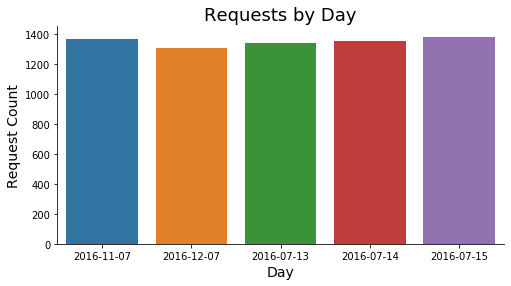

In [15]:
#Plotting cab sequests by day
plt.figure(figsize=(8,4))
sns.countplot(x='pick_date', data=df)
sns.despine()
plt.title("Requests by Day", fontsize = 18)
plt.xlabel("Day", fontsize = 14)
plt.ylabel("Request Count", fontsize = 14)
plt.show()

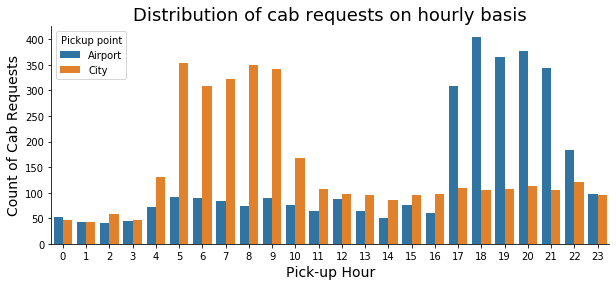

In [16]:
#Plot count plot for all days w.r.t. to pick up hour
plt.figure(figsize=(10, 4))
sns.countplot(x = "pick_hour", hue = "Pickup point", data = df)
sns.despine()
plt.title("Distribution of cab requests on hourly basis", fontsize = 18)
plt.xlabel("Pick-up Hour", fontsize = 14)
plt.ylabel("Count of Cab Requests", fontsize = 14)
plt.show()

There is a surge in the number of requests at night (5-9 PM) at the airport.
There is a surge in the number of requests in the morning (5-9 AM) in the city.

Let's divide the hours in slots for various time period of the day

1. 2am - 5am: Pre_Morning
2. 5am - 10am: Morning_Rush
3. 10am - 5pm: Day_Time
4. 5pm - 10pm: Evening_Rush
5. 10pm - 2am: Late_Night

In [17]:
# function to create a time slot for various time period of day
def time_period(x):
    'divide the time of the day into four categories'
    if 2<= x < 5:
        return "Pre_Morning"
    elif 5 <= x < 10:
        return "Morning_Rush"
    elif 10 <= x < 17:
        return "Day_Time"
    elif 17 <= x < 22:
        return "Evening_Rush"
    else:
        return "Late_Night"

df['time_slot'] = df.pick_hour.apply(lambda x: time_period(x))

df.time_slot.value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Late_Night       682
Pre_Morning      394
Name: time_slot, dtype: int64

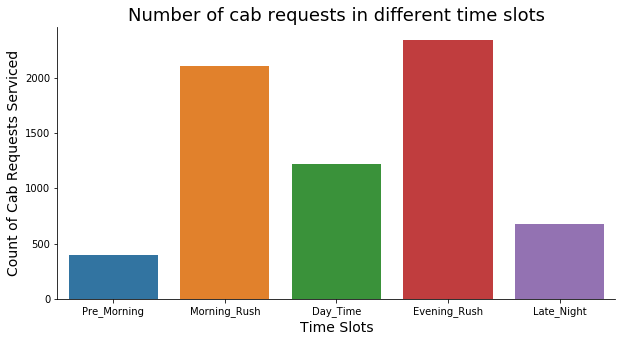

In [18]:
#Plot requests w.r.t. status for different time slots
plt.figure(figsize=(10, 5))
sns.countplot(x = "time_slot", data = df, 
              order= ['Pre_Morning', 'Morning_Rush', "Day_Time", "Evening_Rush", "Late_Night"])
sns.despine()
plt.title("Number of cab requests in different time slots", fontsize = 18)
plt.xlabel("Time Slots", fontsize = 14)
plt.ylabel("Count of Cab Requests Serviced", fontsize = 14)
plt.show()

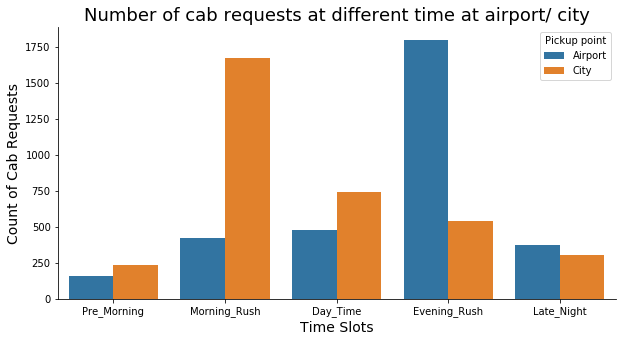

In [19]:
#Plot requests w.r.t. status for different time slots at airport/city
plt.figure(figsize=(10, 5))
sns.countplot(x = "time_slot", data = df, hue = 'Pickup point',
              order= ['Pre_Morning', 'Morning_Rush', "Day_Time", "Evening_Rush", "Late_Night"])
sns.despine()
plt.title("Number of cab requests at different time at airport/ city", fontsize = 18)
plt.xlabel("Time Slots", fontsize = 14)
plt.ylabel("Count of Cab Requests", fontsize = 14)
plt.show()

The morning rush is due to the cab requests in the city and the evening rush is due to cab requests at the airport.

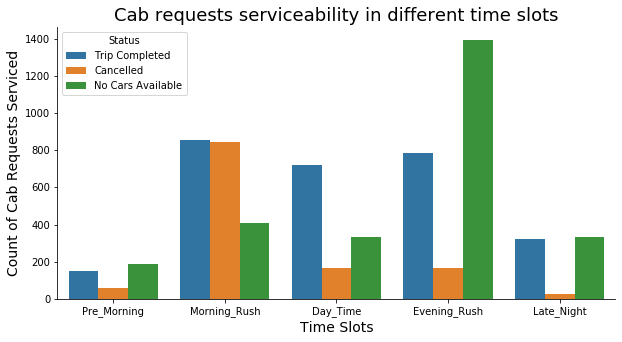

In [20]:
#Plot requests w.r.t. status for different time slots
plt.figure(figsize=(10, 5))
sns.countplot(x = "time_slot", hue = "Status", data = df, 
              order= ['Pre_Morning', 'Morning_Rush', "Day_Time", "Evening_Rush", "Late_Night"])
sns.despine()
plt.title("Cab requests serviceability in different time slots", fontsize = 18)
plt.xlabel("Time Slots", fontsize = 14)
plt.ylabel("Count of Cab Requests Serviced", fontsize = 14)
plt.show()

The graph discloses that there is a large amount of requests unserved due to unavailability of cabs in the evening and many requests are cancelled in the morning.

Previously, we have seen that cab availability issue is at the airport and cancellation in the city. We need to check both the issues wrt to time.

In [21]:
airport = df[df['Pickup point'] == 'Airport']
city = df[df['Pickup point'] == 'City']

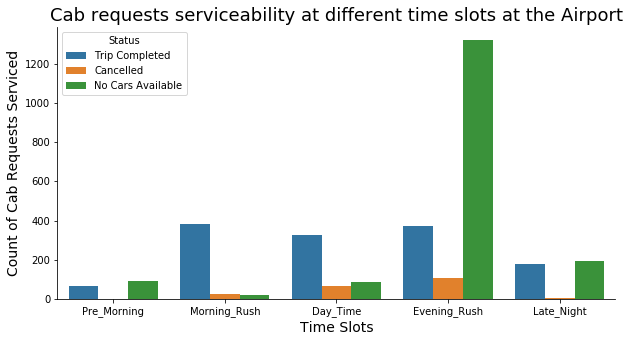

In [22]:
#Plot requests w.r.t. status for different time slots at the airport
plt.figure(figsize=(10, 5))
sns.countplot(x = "time_slot", hue = "Status", data = airport,
              order= ['Pre_Morning', 'Morning_Rush', "Day_Time", "Evening_Rush", "Late_Night"])
sns.despine()
plt.title("Cab requests serviceability at different time slots at the Airport", fontsize = 18)
plt.xlabel("Time Slots", fontsize = 14)
plt.ylabel("Count of Cab Requests Serviced", fontsize = 14)
plt.show()

A large number of cab requests are generated in the evening, but there is no availabilty of cabs, therefore they are unserved

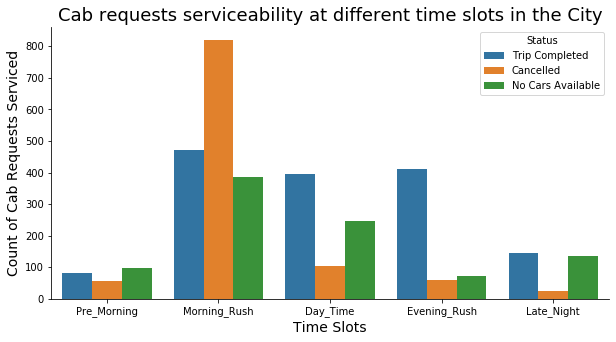

In [23]:
#Plot requests w.r.t. status for different time slots in the city
plt.figure(figsize=(10, 5))
sns.countplot(x = "time_slot", hue = "Status", data = city,
              order= ['Pre_Morning', 'Morning_Rush', "Day_Time", "Evening_Rush", "Late_Night"])
sns.despine()
plt.title("Cab requests serviceability at different time slots in the City", fontsize = 18)
plt.xlabel("Time Slots", fontsize = 14)
plt.ylabel("Count of Cab Requests Serviced", fontsize = 14)
plt.show()


A large number of requests are denied in the morning.

By comparing both the graphs, it can be suggested that the less number of cabs are going to the airport from city and thus very less number of cabs are available at the airport in the evening.

In [24]:
#Let's create pie charts instead of a count plots
def pie_chart(dataframe):
    """
    creates a pie chart
    input: dataframe with a 'category' as index and a numerical column
    output: pie chart
    """
    labels = dataframe.index.values
    sizes = dataframe['Status'].values
        
    fig1, ax1 = plt.subplots()
    fig1 = plt.figure(figsize=(8, 4))
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

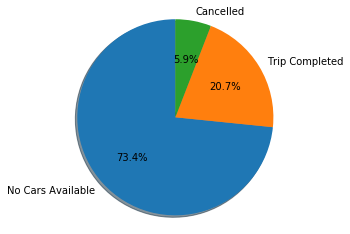

<Figure size 576x288 with 0 Axes>

In [25]:
#Status of trips at Airport in the evening rush time
df_airport = airport[airport.time_slot == "Evening_Rush"]
df_airport_count = pd.DataFrame(df_airport.Status.value_counts())
pie_chart(df_airport_count)

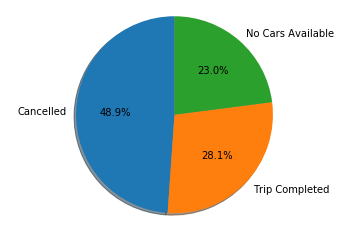

<Figure size 576x288 with 0 Axes>

In [26]:
#Status of trips in the city in the morning rush time 
df_city = city[city.time_slot == "Morning_Rush"]
df_city_count = pd.DataFrame(df_city.Status.value_counts())
pie_chart(df_city_count)

## Conclusion:
Airport : Upon analysis, the evening time slot seems to be most problematic for pickup points as airport as the requests are not served due to unavailability of cabs. The unavailability of cabs at the airport in the evening slot may be due to the less number of cabs travelling from city to the airport (less number of request in the city at evening).

City : As per the analysis, the morning time slot is most problematic where the requests are being cancelled. Most probably the requests are being cancelled by the drivers the reason being they have to wait for a long time or return empty, as their are few request for cab at the airport in the morning.